In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate as interpolate
import torch

ImportError: No module named torch

# 1. Generate polynomials

Here we use fourth degree polynomials $ax^{4} + bx^{3} + cx^{2} + dx + e$

In [75]:
def f(x, p):
    """
    p = [a, b, c, d, e]
    """
    return p[0]*x**4 + p[1]*x**3 + p[2]*x**2 + p[3]*x + p[4]

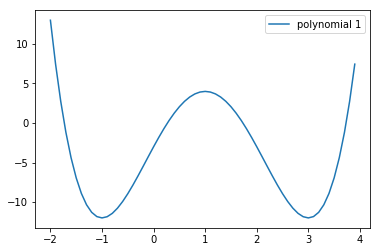

In [76]:
x = np.arange(-2, 4, 0.1)
fx1 = f(x, [1, -4, -2, 12, -3])

plt.plot(x, fx1, label="polynomial 1")
plt.legend()
plt.show()

Randomly sample points from polynomials

# 2. Using B-splines to fit the sample points

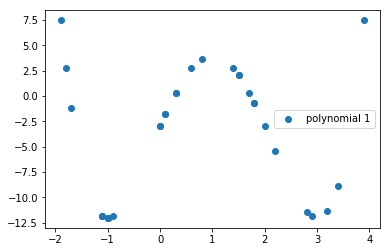

In [77]:
x_sample = np.random.choice(x, 30)
fx1_sample = f(x_sample, [1, -4, -2, 12, -3])

plt.scatter(x_sample, fx1_sample, label="polynomial 1")
plt.legend()
plt.show()

t: [-2.00000000e+00 -2.00000000e+00 -2.00000000e+00 -2.00000000e+00
 -1.80000000e+00 -1.70000000e+00 -1.60000000e+00 -1.50000000e+00
 -1.40000000e+00 -1.30000000e+00 -1.20000000e+00 -1.10000000e+00
 -1.00000000e+00 -9.00000000e-01 -8.00000000e-01 -7.00000000e-01
 -6.00000000e-01 -5.00000000e-01 -4.00000000e-01 -3.00000000e-01
 -2.00000000e-01 -1.00000000e-01  1.77635684e-15  1.00000000e-01
  2.00000000e-01  3.00000000e-01  4.00000000e-01  5.00000000e-01
  6.00000000e-01  7.00000000e-01  8.00000000e-01  9.00000000e-01
  1.00000000e+00  1.10000000e+00  1.20000000e+00  1.30000000e+00
  1.40000000e+00  1.50000000e+00  1.60000000e+00  1.70000000e+00
  1.80000000e+00  1.90000000e+00  2.00000000e+00  2.10000000e+00
  2.20000000e+00  2.30000000e+00  2.40000000e+00  2.50000000e+00
  2.60000000e+00  2.70000000e+00  2.80000000e+00  2.90000000e+00
  3.00000000e+00  3.10000000e+00  3.20000000e+00  3.30000000e+00
  3.40000000e+00  3.50000000e+00  3.60000000e+00  3.70000000e+00
  3.90000000e+00  3.90

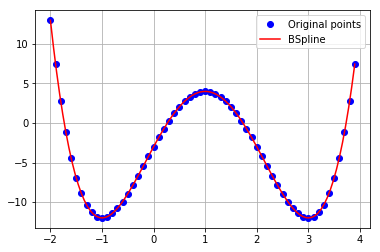

In [78]:
# k Degree 3 Beizer curves
t, c, k = interpolate.splrep(x, fx1, s=0, k=3)
print('''\
t: {}
c: {}
k: {}
'''.format(t, c, k))
N = 100
xmin, xmax = x.min(), x.max()
xx = np.linspace(xmin, xmax, N)
spline = interpolate.BSpline(t, c, k, extrapolate=False)

plt.plot(x, fx1, 'bo', label='Original points')
plt.plot(xx, spline(xx), 'r', label='BSpline')
plt.grid()
plt.legend(loc='best')
plt.show()

# 3. Generate Dataset to feed in VAE or U-Net